![Полносвязные слои!](2023.09.22/1.png "Полносвязные слои")

![Полносвязные слои!](2023.09.22/2.png "Полносвязные слои")

![Полносвязные слои!](2023.09.22/3.png "Полносвязные слои")

![Полносвязные слои!](2023.09.22/4.png "Полносвязные слои")

![Полносвязные слои!](2023.09.22/5.png "Полносвязные слои")

![Полносвязные слои!](2023.09.22/6.png "Полносвязные слои")

![Полносвязные слои!](2023.09.22/7.png "Полносвязные слои")

![Полносвязные слои!](2023.09.22/8.png "Полносвязные слои")

Нейросеть онлайн

https://playground.tensorflow.org/#activation=relu&regularization=L2&batchSize=10&dataset=spiral&regDataset=reg-gauss&learningRate=0.001&regularizationRate=0.001&noise=0&networkShape=6,4&seed=0.31854&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=true&xSquared=true&ySquared=true&cosX=false&sinX=true&cosY=false&sinY=true&collectStats=false&problem=regression&initZero=false&hideText=false

In [86]:
!pip install numpy
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [1]:
import numpy as np
import pandas as pd

In [2]:
def f(x):
    return x * x

In [3]:
a = np.array(range(10))
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
f(a)

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [5]:
n = 10
data = pd.DataFrame({
    "y": np.array(range(n)),
    "x": f(np.array(range(n))),
    # "x2": f(np.array(range(n)))/2,
    "x3": 1,
})[["x", "x3", "y"]]
data

,x,x3,y
0,0,1,0
1,1,1,1
2,4,1,2
3,9,1,3
4,16,1,4
5,25,1,5
6,36,1,6
7,49,1,7
8,64,1,8
9,81,1,9


In [6]:
X = data[["x", "x3"]].copy()
y = data[["y"]].copy()
X

,x,x3
0,0,1
1,1,1
2,4,1
3,9,1
4,16,1
5,25,1
6,36,1
7,49,1
8,64,1
9,81,1


In [70]:
Xmean = X["x"].mean()
Xstd = X["x"].std()
Xmean, Xstd

(28.5, 28.3048876815766)

In [88]:
y_mean = y.mean()
y_std = y.std()
y_mean, y_std

(y    4.5
 dtype: float64,
 y    3.02765
 dtype: float64)

In [71]:
X["x"] = (X["x"] - X["x"].mean())/X["x"].std()

In [89]:
y = (y - y_mean)/y_std

In [50]:
m1 = np.random.rand(2,2)*2-1
m1

array([[-0.99381314,  0.96284708],
       [-0.91119365, -0.48137702]])

In [51]:
m1[0][0]

-0.9938131425956052

In [52]:
k = 3
X.iloc[k]

x     9
x3    1
Name: 3, dtype: int64

In [53]:
X.iloc[k].values

array([9, 1])

In [54]:
z0 = X.iloc[k].values.reshape((2,1))
z0

array([[9],
       [1]])

In [55]:
z1 = m1.dot(z0)
z1

array([[-7.9814712 ],
       [-8.68211983]])

In [56]:
m1[0,0] * z0[0][0] + m1[0,1] * z0[1][0]

-7.981471199602789

In [57]:
m1[1,0] * z0[0][0] + m1[1,1] * z0[1][0]

-8.682119834328685

In [7]:
def F(x):
    return 2/(1 + np.exp(-x)) - 1

In [64]:
F(z1)

array([[-0.99931676],
       [-0.99966088]])

In [65]:
z0 = X.iloc[k].values.reshape((2,1))

m1 = np.random.rand(2,2) * 2 - 1
z1 = F(m1.dot(z0))
m2 = np.random.rand(2,2) * 2 - 1
z2 = F(m2.dot(z1))
m3 = np.random.rand(1,2) * 2 - 1
z3 = m3.dot(z2)

In [66]:
z3

array([[-0.0600061]])

In [67]:
X.T.values.shape

(2, 10)

In [68]:
X.T

,0,1,2,3,4,5,6,7,8,9
x,0,1,4,9,16,25,36,49,64,81
x3,1,1,1,1,1,1,1,1,1,1


In [31]:
m1 = np.random.rand(2,2) * 2 - 1
m1

array([[-0.36862564, -0.06704879],
       [-0.12608767,  0.83720833]])

In [33]:
pd.DataFrame(m1.dot(X.T.values))

,0,1,2,3,4,5,6,7,8,9
0,-0.067049,-0.435674,-1.541551,-3.384680,-5.965059,-9.282690,-13.337572,-18.129705,-23.659090,-29.925726
1,0.837208,0.711121,0.332858,-0.297581,-1.180194,-2.314983,-3.701948,-5.341087,-7.232402,-9.375893


In [69]:
pd.DataFrame(m1.dot(X.T.values))

,0,1,2,3,4,5,6,7,8,9
0,0.663140,1.544301,4.187783,8.593586,14.761711,22.692157,32.384924,43.840012,57.057422,72.037153
1,0.021633,0.905013,3.555152,7.972051,14.155710,22.106128,31.823306,43.307243,56.557940,71.575396


$M_3 \cdot F(M_2  \cdot F(M_1 \cdot X^T)^T)^T$

In [70]:
z3 = m3.dot(F(m2.dot(F(m1.dot(X.T.values)).T)).T)
z3

array([[ 0.02321532, -0.00843808, -0.05500224, -0.0600061 , -0.06006853,
        -0.06006866, -0.06006866, -0.06006866, -0.06006866, -0.06006866]])

In [71]:
m1

array([[0.88116066, 0.66314025],
       [0.88337979, 0.02163313]])

In [72]:
m2

array([[-0.82940494, -0.42021515],
       [ 0.18026488, -0.91835889]])

In [73]:
m3

array([[-0.11162952,  0.34535172]])

In [11]:
def L(y_true, y_pred):
    return (y_true - y_pred)**2

In [10]:
def F(x):
    return 2/(1 + np.exp(-x)) - 1

In [75]:
L(y, z3.T)

,y
0,0.000539
1,1.016947
2,4.223034
3,9.363637
4,16.484156
5,25.604295
6,36.724432
7,49.844569
8,64.964707
9,82.084844


In [76]:
np.mean(L(y, z3.T)).iloc[0]

29.031116160505867

In [77]:
data["y_pred"] = z3.T
data["y_delta"] = L(y, z3.T)

In [78]:
data[["x", "x3", "y", "y_pred", "y_delta"]]

,x,x3,y,y_pred,y_delta
0,0,1,0,0.023215,0.000539
1,1,1,1,-0.008438,1.016947
2,4,1,2,-0.055002,4.223034
3,9,1,3,-0.060006,9.363637
4,16,1,4,-0.060069,16.484156
5,25,1,5,-0.060069,25.604295
6,36,1,6,-0.060069,36.724432
7,49,1,7,-0.060069,49.844569
8,64,1,8,-0.060069,64.964707
9,81,1,9,-0.060069,82.084844


In [79]:
m1

array([[0.88116066, 0.66314025],
       [0.88337979, 0.02163313]])

In [80]:
m2

array([[-0.82940494, -0.42021515],
       [ 0.18026488, -0.91835889]])

In [81]:
m3

array([[-0.11162952,  0.34535172]])

In [84]:
np.arange(-1, 1.1, 0.1)

array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01,
        1.00000000e+00])

In [85]:
d = 0.1
r = 10000000
res_w = None
for i0 in np.arange(-1, 1.1, d):
    for i1 in np.arange(-1, 1.1, d):
        for i2 in np.arange(-1, 1.1, d):
            for i3 in np.arange(-1, 1.1, d):
                for i4 in np.arange(-1, 1.1, d):
                    for i5 in np.arange(-1, 1.1, d):
                        for i6 in np.arange(-1, 1.1, d):
                            for i7 in np.arange(-1, 1.1, d):
                                for i8 in np.arange(-1, 1.1, d):
                                    for i9 in np.arange(-1, 1.1, d):
                                        m1 = np.array([[i0, i1], [i2, i3]])
                                        m2 = np.array([[i4, i5], [i6, i7]])
                                        m3 = np.array([[i8, i9]])
                                        z3 = m3.dot(F(m2.dot(F(m1.dot(X.T.values)))))
                                        r_new = np.mean(L(y, z3.T)).iloc[0]
                                        if r_new < r:
                                            r = r_new
                                            res_w = (m1, m2, m3)
                                            print(i0,i1,i2,i3,i4,i5,i6,i7,i8,i9, r)

-1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 44.248342131013764
-1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -0.9 43.361551786227224
-1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -0.8 42.48522178230761
-1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -0.7000000000000001 41.61935211925494
-1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -0.6000000000000001 40.76394279706919
-1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -0.5000000000000001 39.918993815750376
-1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -0.40000000000000013 39.084505175298496
-1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -0.30000000000000016 38.26047687571354
-1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -0.20000000000000018 37.44690891699552
-1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -0.1000000000000002 36.643801299144435
-1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -2.220446049250313e-16 35.85115402216028
-1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 0.09999999999999964 35.06896708604306
-1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.

KeyboardInterrupt: 

In [86]:
dt = 0.1
r = 10000000
res_w = None
for i0 in np.arange(-1, 1.1, dt):
    for i1 in np.arange(-1, 1.1, dt):
        for i2 in np.arange(-1, 1.1, dt):
            for i3 in np.arange(-1, 1.1, dt):
#                 for i4 in np.arange(0.1, 1.1, dt):
#                     for i5 in np.arange(0.1, 1.1, dt):
#                         for i6 in np.arange(0.1, 1.1, dt):
#                             for i7 in np.arange(0.1, 1.1, dt):
                for i8 in np.arange(-1, 1.1, dt):
                    for i9 in np.arange(-1, 1.1, dt):
                        m1 = np.array([[i0, i1], [i2, i3]])
                        # m2 = np.array([[i4, i5], [i6, i7]])
                        m3 = np.array([[i8, i9]])
                        # z3 = m3.dot(m2.dot(m1.dot(X.T.values)))
                        z3 = m3.dot(F(m1.dot(X.T.values)))
                        r_new = np.mean(L(y, z3.T)).iloc[0]
                        if r_new < r:
                            r = r_new
#                                             res_w = (m1, m2, m3)
#                                             print(i0,i1,i2,i3,i4,i5,i6,i7,i8,i9, r)
                            res_w = (m1,m3)
                            print(i0,i1,i2,i3,i8,i9, r)

-1.0 -1.0 -1.0 -1.0 -1.0 -1.0 14.11290156643508
-1.0 -1.0 -1.0 -0.9 -1.0 -1.0 14.103404017395002
-1.0 -1.0 -1.0 -0.8 -1.0 -1.0 14.093874303466558
-1.0 -1.0 -1.0 -0.7000000000000001 -1.0 -1.0 14.084390921951229
-1.0 -1.0 -1.0 -0.6000000000000001 -1.0 -1.0 14.075037964580414
-1.0 -1.0 -1.0 -0.5000000000000001 -1.0 -1.0 14.065903695633091
-1.0 -1.0 -1.0 -0.40000000000000013 -1.0 -1.0 14.05707888883955
-1.0 -1.0 -1.0 -0.30000000000000016 -1.0 -1.0 14.048654976892328
-1.0 -1.0 -1.0 -0.20000000000000018 -1.0 -1.0 14.04072208008302
-1.0 -1.0 -1.0 -0.1000000000000002 -1.0 -1.0 14.033366988621456
-1.0 -1.0 -1.0 -2.220446049250313e-16 -1.0 -1.0 14.026671175832641
-1.0 -1.0 -1.0 0.09999999999999964 -1.0 -1.0 14.020708916699425
-1.0 -1.0 -1.0 0.19999999999999973 -1.0 -1.0 14.015545578937495
-1.0 -1.0 -1.0 0.2999999999999998 -1.0 -1.0 14.01123614337472
-1.0 -1.0 -1.0 0.3999999999999997 -1.0 -1.0 14.007823998569474
-1.0 -1.0 -1.0 0.49999999999999956 -1.0 -1.0 14.005340042948308
-1.0 -1.0 -1.0 0.5999

KeyboardInterrupt: 

In [91]:
def get_w(i0):
    dt = 0.1
    r = 10000000
    res_w = None
    for i1 in np.arange(-1, 1.1, dt):
        for i2 in np.arange(-1, 1.1, dt):
            for i3 in np.arange(-1, 1.1, dt):
                for i8 in np.arange(-1, 1.1, dt):
                    for i9 in np.arange(-1, 1.1, dt):
                        m1 = np.array([[i0, i1], [i2, i3]])
                        m3 = np.array([[i8, i9]])
                        z3 = m3.dot(F(m1.dot(X.T.values)))
                        r_new = np.mean(L(y, z3.T)).iloc[0]
                        if r_new < r:
                            r = r_new
                            res_w = (m1,m3)
                            # print(i0,i1,i2,i3,i8,i9, r)
    return r, m1, m3

In [ ]:
from multiprocessing import Pool

cpu_number = 12
with Pool(cpu_number) as p:
    res = p.map(get_w, np.arange(-1, 1.1, dt))

In [93]:
m1

array([[-1. , -1. ],
       [-0.6, -0.6]])

In [11]:
from itertools import product

In [133]:
list(product([0,1], repeat=4))

[(0, 0, 0, 0),
 (0, 0, 0, 1),
 (0, 0, 1, 0),
 (0, 0, 1, 1),
 (0, 1, 0, 0),
 (0, 1, 0, 1),
 (0, 1, 1, 0),
 (0, 1, 1, 1),
 (1, 0, 0, 0),
 (1, 0, 0, 1),
 (1, 0, 1, 0),
 (1, 0, 1, 1),
 (1, 1, 0, 0),
 (1, 1, 0, 1),
 (1, 1, 1, 0),
 (1, 1, 1, 1)]

In [125]:
np.array(list(product([0,1], repeat=4))).reshape((-1, 2, 2))

array([[[0, 0],
        [0, 0]],

       [[0, 0],
        [0, 1]],

       [[0, 0],
        [1, 0]],

       [[0, 0],
        [1, 1]],

       [[0, 1],
        [0, 0]],

       [[0, 1],
        [0, 1]],

       [[0, 1],
        [1, 0]],

       [[0, 1],
        [1, 1]],

       [[1, 0],
        [0, 0]],

       [[1, 0],
        [0, 1]],

       [[1, 0],
        [1, 0]],

       [[1, 0],
        [1, 1]],

       [[1, 1],
        [0, 0]],

       [[1, 1],
        [0, 1]],

       [[1, 1],
        [1, 0]],

       [[1, 1],
        [1, 1]]])

In [90]:
dt = 0.1
M1 = np.array(list(product(np.arange(-1, 1.1, dt), repeat=4))).reshape((-1, 2, 2))
# M2 = np.array(list(product(np.arange(-1, 1.1, dt), repeat=4))).reshape((-1, 2, 2))
M3 = np.array(list(product(np.arange(-1, 1.1, dt), repeat=2))).reshape((-1, 1, 2))

In [42]:
M1.shape, M2.shape, M3.shape

((194481, 2, 2), (1296, 2, 2), (441, 1, 2))

In [12]:
M1 = np.array(list(product([0,1], repeat=4))).reshape((-1, 2, 2))
# M2 = np.array(list(product([0,1], repeat=4))).reshape((-1, 2, 2))
M3 = np.array(list(product([0,1], repeat=2))).reshape((-1, 1, 2))

In [13]:
M1

array([[[0, 0],
        [0, 0]],

       [[0, 0],
        [0, 1]],

       [[0, 0],
        [1, 0]],

       [[0, 0],
        [1, 1]],

       [[0, 1],
        [0, 0]],

       [[0, 1],
        [0, 1]],

       [[0, 1],
        [1, 0]],

       [[0, 1],
        [1, 1]],

       [[1, 0],
        [0, 0]],

       [[1, 0],
        [0, 1]],

       [[1, 0],
        [1, 0]],

       [[1, 0],
        [1, 1]],

       [[1, 1],
        [0, 0]],

       [[1, 1],
        [0, 1]],

       [[1, 1],
        [1, 0]],

       [[1, 1],
        [1, 1]]])

In [14]:
M1.shape, M2.shape, M3.shape

NameError: name 'M2' is not defined

In [91]:
M1.shape, M3.shape

((194481, 2, 2), (441, 1, 2))

In [92]:
X.T.values

array([[-1.00689324, -0.97156365, -0.86557489, -0.68892695, -0.44161984,
        -0.12365356,  0.2649719 ,  0.72425654,  1.25420035,  1.85480333],
       [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ]])

In [51]:
M1[0, :, :]

array([[-1., -1.],
       [-1., -1.]])

In [18]:
M2

NameError: name 'M2' is not defined

In [19]:
M3

array([[[0, 0]],

       [[0, 1]],

       [[1, 0]],

       [[1, 1]]])

In [20]:
temp1 = F(M1.dot(X.T.values))
temp1.shape

(16, 2, 10)

In [21]:
temp1[0]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [24]:
pd.DataFrame(temp1[0])

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
np.moveaxis(temp1, (1,2), (2, 1))[0]

array([[-0.46211716, -0.46211716],
       [-0.76159416, -0.76159416],
       [-0.9866143 , -0.9866143 ],
       [-0.9999092 , -0.9999092 ],
       [-0.99999992, -0.99999992],
       [-1.        , -1.        ],
       [-1.        , -1.        ],
       [-1.        , -1.        ],
       [-1.        , -1.        ],
       [-1.        , -1.        ]])

In [21]:
temp1 = np.moveaxis(temp1, (1,2), (2, 1))

In [50]:
temp1.T.shape

(10, 2, 16)

In [31]:
temp1.shape

(16, 2, 10)

In [30]:
M2.shape

(16, 2, 2)

In [22]:
temp2 = F(M2.dot(temp1))
temp2.shape

NameError: name 'M2' is not defined

In [39]:
temp2.T.shape

(16, 10, 2, 16)

In [37]:
temp2[0, :, :, 0]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [38]:
M3.shape

(4, 1, 2)

In [23]:
temp3 = M3.dot(temp1)

In [24]:
temp3.shape

(4, 1, 16, 10)

In [93]:
res = M3.dot(F(M1.dot(X.T.values)))
res.shape

(441, 1, 194481, 10)

In [22]:
res = M3.dot(F(M2.dot(F(M1.dot(X.T.values)).T)).T)
res.shape

(36, 1, 1296, 10, 1296)

In [94]:
for i in range(10):
    res[ :, :, :, i] -= y.values[i][0]

In [95]:
res = (((res)**2).mean(axis=3))
print(res.shape)
print(res.min())
nw = np.argwhere(res == res.min())
nw

(441, 1, 194481)
0.06083692423376143


array([[   0,    0, 3979],
       [   0,    0, 4419]])

In [96]:
m1_best = M1[nw[0][2]]
m1_best

array([[-1.00000000e+00, -1.00000000e-01],
       [-1.00000000e+00, -2.22044605e-16]])

In [97]:
m3_best = M3[nw[0][0]]
m3_best

array([[-1., -1.]])

In [23]:
for i in range(10):
    res[:, :, :, i, :] -= y.values[i][0]

In [24]:
res = (((res)**2).mean(axis=3))
print(res.shape)
nw = np.argwhere(res == res.min())
nw

(36, 1, 1296, 1296)


array([[   0,    0,   75, 1295],
       [   0,    0,  104, 1110],
       [   0,    0,  110, 1295],
       [   0,    0,  141, 1110],
       [   0,    0, 1154,  185],
       [   0,    0, 1185,    0],
       [   0,    0, 1191,  185],
       [   0,    0, 1220,    0],
       [   5,    0,   75, 1260],
       [   5,    0,  104, 1085],
       [   5,    0,  110, 1260],
       [   5,    0,  141, 1085],
       [   5,    0, 1154,  210],
       [   5,    0, 1185,   35],
       [   5,    0, 1191,  210],
       [   5,    0, 1220,   35],
       [  30,    0,   75,   35],
       [  30,    0,  104,  210],
       [  30,    0,  110,   35],
       [  30,    0,  141,  210],
       [  30,    0, 1154, 1085],
       [  30,    0, 1185, 1260],
       [  30,    0, 1191, 1085],
       [  30,    0, 1220, 1260],
       [  35,    0,   75,    0],
       [  35,    0,  104,  185],
       [  35,    0,  110,    0],
       [  35,    0,  141,  185],
       [  35,    0, 1154, 1110],
       [  35,    0, 1185, 1295],
       [  

In [25]:
res.min()

16.857231093780978

In [26]:
m1_best = M1[nw[0][3]]
m1_best

array([[1., 1.],
       [1., 1.]])

In [27]:
m2_best = M2[nw[0][2]]
m2_best

array([[-1. , -0.2],
       [-1. ,  0.2]])

In [28]:
m3_best = M3[nw[0][0]]
m3_best

array([[-1., -1.]])

In [103]:
z3 = m3_best.dot(F(m1_best.dot(X.T.values)))

In [104]:
z3.shape

(1, 10)

In [39]:
res_w

(array([[0.1, 1. ],
        [0.1, 1. ]]),
 array([[0.4, 0.7]]))

In [40]:
m1 = res_w[0]
m3 = res_w[1]

In [44]:
z3 = m3.dot(m1.dot(X.T.values))

In [125]:
data["y_pred"] = z3.T*y_std[0] + y_mean[0]
data["y_delta"] = L(data["y"], data["y_pred"])

In [126]:
data[["x", "x3", "y", "y_pred", "y_delta"]]

,x,x3,y,y_pred,y_delta
0,0,1,0,1.806749,3.264343
1,1,1,1,1.893181,0.797772
2,4,1,2,2.160311,0.025700
3,9,1,3,2.629838,0.137020
4,16,1,4,3.329941,0.448979
5,25,1,5,4.277243,0.522378
6,36,1,6,5.445242,0.307757
7,49,1,7,6.732485,0.071564
8,64,1,8,7.968728,0.000978
9,81,1,9,8.984916,0.000228


In [127]:
%matplotlib inline

<AxesSubplot:xlabel='x'>

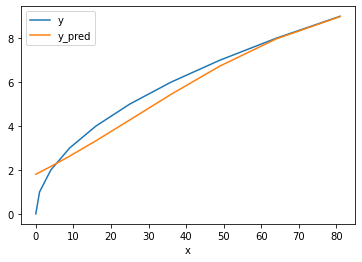

In [128]:
data.set_index("x")[["y", "y_pred"]].plot()

In [118]:
np.array([[(100 - Xmean)/Xstd], [1]])

array([[2.52606549],
       [1.        ]])

In [119]:
m1_best.shape, m3_best.shape

((2, 2), (1, 2))

In [135]:
m3_best.dot(F(m1_best.dot(np.array([[(120 - Xmean)/Xstd], [1]])))) * y_std[0] + y_mean[0]

array([[10.11675894]])

In [136]:
np.sqrt(120)

10.954451150103322

In [138]:
Xmean, Xstd, y_mean[0], y_std[0]

(28.5, 28.3048876815766, 4.5, 3.0276503540974917)

In [139]:
m1_best

array([[-1.00000000e+00, -1.00000000e-01],
       [-1.00000000e+00, -2.22044605e-16]])

In [140]:
m3_best

array([[-1., -1.]])

In [161]:
def nn_sqrt(x):
    return (-2/(1 + np.exp((x - 25.67)/28.3)) - 2/(1 + np.exp((x - 28.5)/28.3)) + 2) * 3 + 4.5

In [169]:
nn_sqrt(90)

9.326641257281567

In [170]:
np.sqrt(90)

9.486832980505138

In [12]:
k = 3
z0 = X.iloc[k].values.reshape((2,1))

m1 = np.random.rand(2,2) * 2 - 1
z1 = F(m1.dot(z0))
m2 = np.random.rand(2,2) * 2 - 1
z2 = F(m2.dot(z1))
m3 = np.random.rand(1,2) * 2 - 1
z3 = m3.dot(z2)

In [13]:
m1

array([[0.93809362, 0.54970108],
       [0.71059884, 0.23523062]])

In [14]:
m2

array([[ 0.58230745, -0.96530759],
       [-0.82166874,  0.32407574]])

In [15]:
m3

array([[-0.42384504,  0.26279888]])

In [16]:
dx = 0.01
def forward(m1, m2, m3, X):
    return m3.dot(F(m2.dot(F(m1.dot(X)))))

In [ ]:
X.T.values;

In [ ]:
res = M3.dot(F(M2.dot(F(M1.dot(X.T.values)).T)).T)
res.shape